## 비지도 학습
#### 차원축소

In [931]:
import pandas as pd

In [932]:
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [933]:
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [934]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [935]:
df = data.copy()

In [936]:
from sklearn.decomposition import PCA

In [937]:
pca = PCA(n_components=2)

In [938]:
df = pca.fit_transform(df)

In [939]:
df.shape

(178, 2)

## 시각화

In [940]:
import matplotlib.pyplot as plt

In [941]:
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


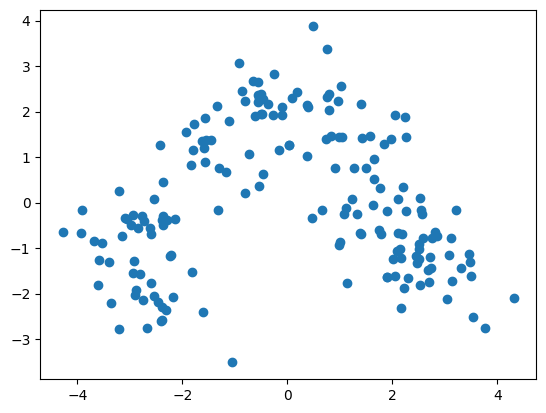

In [942]:
# scatter
plt.scatter(df.iloc[:,0], df.iloc[:,1])

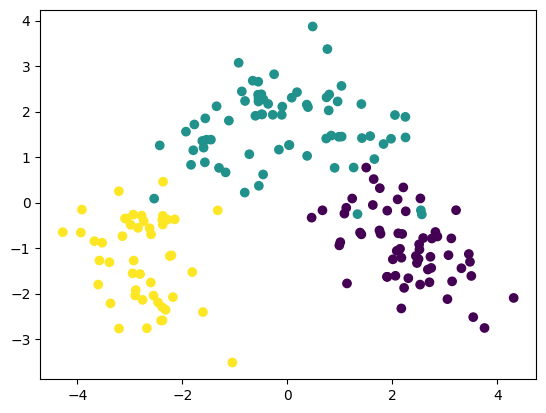

In [943]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [944]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693528


#### 지도 학습(PCA 전후 비교)

In [945]:
# PCA 후 데이터로 머신러닝 (2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9492063492063492

In [946]:
# PCA 전 데이터로 머신러닝 (13)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

0.9553968253968254

### PCA(3차원) 시각화

In [947]:
# 새 데이터 복사
df = data.copy()

In [948]:
# pca (n_components=3)
pca = PCA(n_components=3)

In [949]:
# pca 변환
df = pca.fit_transform(df)

In [950]:
df = pd.DataFrame(df)

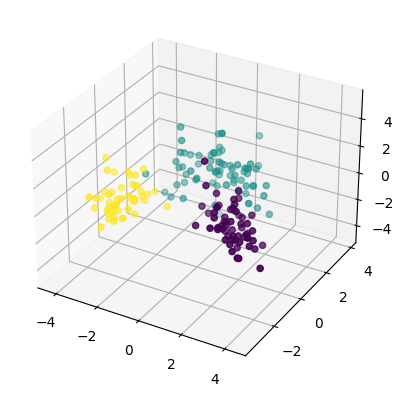

In [951]:
# 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=dataset.target)

### 점진적 PCA

In [952]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [953]:
# 데이터복사
df = data.copy()

In [954]:
pca = IncrementalPCA(n_components=2, batch_size=16)

In [955]:
# 점진적 PCA()
df = pca.fit_transform(df)

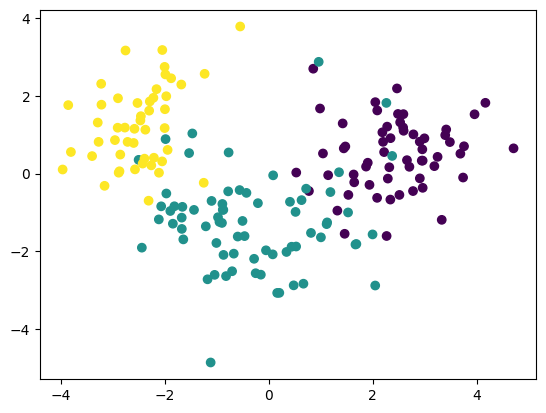

In [956]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [957]:
# 데이터 설명(%)j
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001543975


### 희소 PCA

In [958]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [959]:
# 데이터복사
df = data.copy()

In [960]:
# 희소 PCA
pca = SparsePCA(n_components=2, alpha=0.01)

In [961]:
df = pca.fit_transform(df)

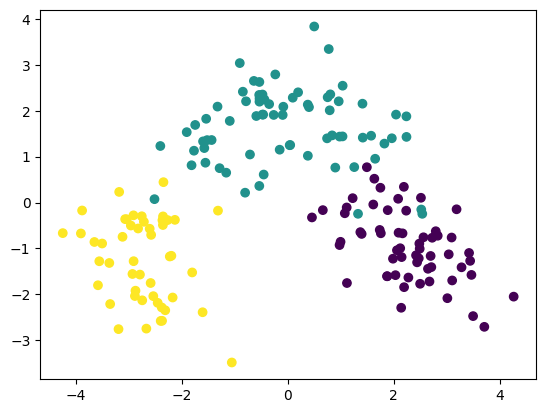

In [962]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

### 커널 PCA

In [963]:
from sklearn.decomposition import KernelPCA

In [964]:
# 데이터복사
df = data.copy()

In [965]:
# 희소 PCA
pca = SparsePCA(n_components=2)

In [966]:
df = pca.fit_transform(df)

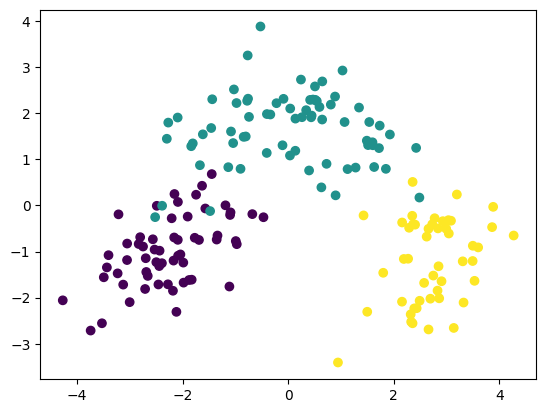

In [967]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

### SVD(Singular Value Decomposition) 특이값 분해**
- 행렬을 특정한 구조로 분해나는 
- 신호처리와 통계학 등의 분야에서 자주 사용됨

In [968]:
from sklearn.decomposition import TruncatedSVD

In [969]:
# SVD 적용
df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)


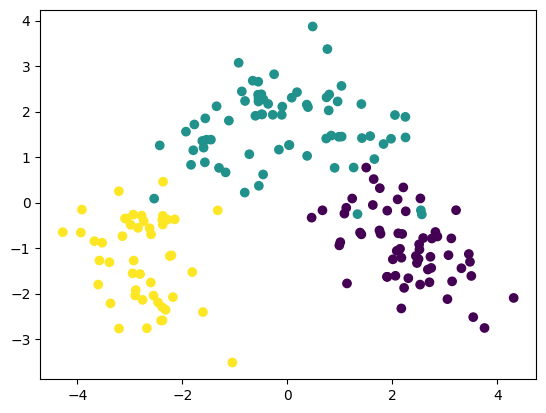

In [970]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

# 클러스터링(군집)

### 비계층적 군집분석

In [971]:
from sklearn.cluster import KMeans

In [972]:
# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [973]:
# KMeans 선언 및 학습
kmeans =  KMeans(n_clusters=3)
kmeans.fit(df)

/Users/chodaehee/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [974]:
# KMeans 예측
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [975]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


##### PCA - 군집 - 시각화

In [976]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [977]:
# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

/Users/chodaehee/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


In [978]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

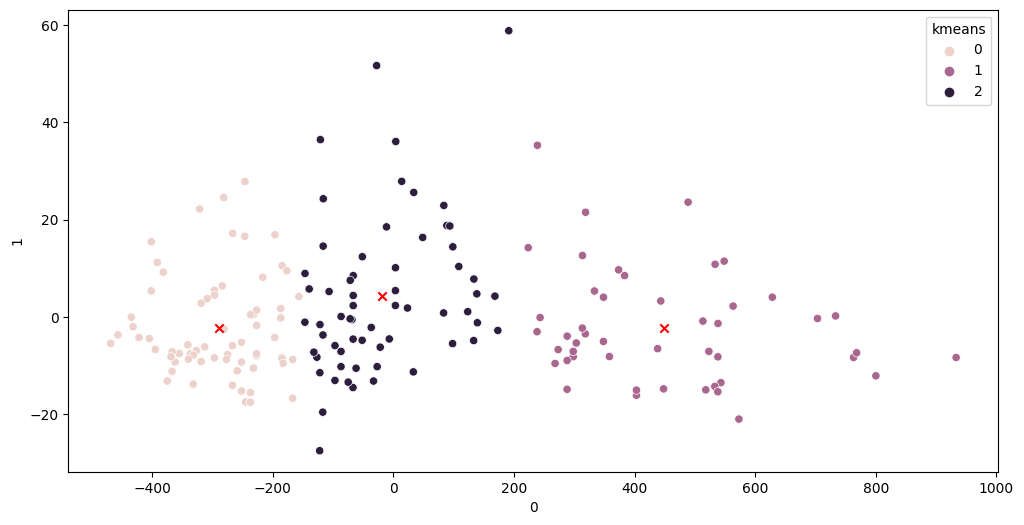

In [979]:
# 시각화
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')

##### 클러스터 개수 찾는 방법 (Elbow method)

/Users/chodaehee/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chodaehee/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chodaehee/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chodaehee/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

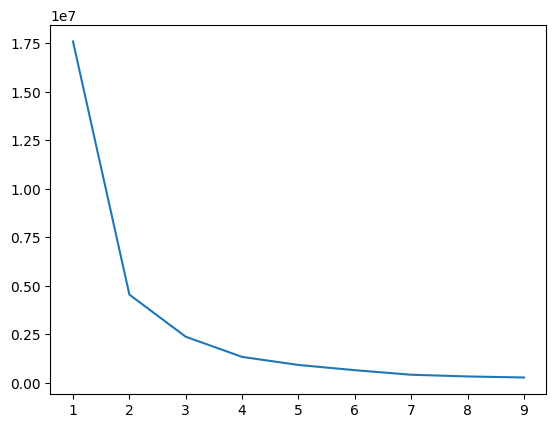

In [980]:
# 군집 수 찾기
inertia = []
df.columns = df.columns.astype(str)

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)

### 계층적 군집 분석
- k-means와 달리 군집 개수를 사전에 설정하지 않음
- 덴드로그램

In [981]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [982]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [984]:
# sampling
kdata = df[:3].copy()
kdata = pd.concat([kdata, df[70:73]])
kdata = pd.concat([kdata, df[160:163]])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411472097, 30.991512411472097, 0.0],
  [0.0, 147.87787795984826, 147.87787795984826, 30.991512411472097],
  [0.0, 48.02737852215115, 48.02737852215115, 0.0],
  [0.0, 88.07194000276094, 88.07194000276094, 48.02737852215115],
  [0.0, 135.8713524897331, 135.8713524897331, 88.07194000276094],
  [0.0, 190.03011431770912, 190.03011431770912, 0.0],
  [135.8713524897331,
   461.0158736911468,
   461.0158736911468,
   190.03011431770912],
  [147.87787795984826,
   1026.3965443828536,
   1026.3965443828536,
   461.0158736911468]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 

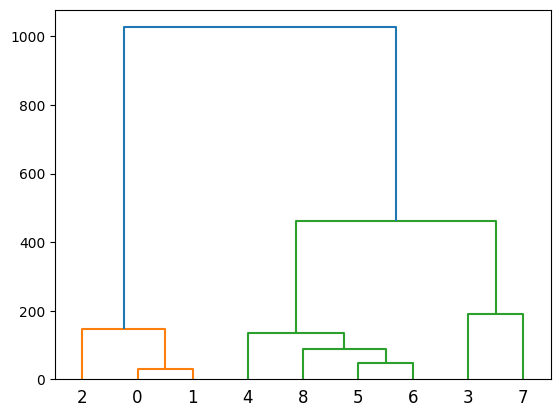

In [985]:
# 덴드로그램
linkage = ward(kdata)
dendrogram(linkage)